In [1]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_npy(hold_position):
    file_path = "../Output/validation/validation_" + hold_position + "/validation_" + hold_position
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")[:, 0:-1:2]
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_amplitude_frequency_range5Hz.npy")[:, 0:-1:2]
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), z_lacc_FFT, z_gyro_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_gyro_FFT
    return result

In [ ]:
def load_npy(hold_position):
    file_path = "../Output/validation/validation_" + hold_position + "/validation_" + hold_position
    xy_mean = np.load(file_path + "_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_laccel_z_mean.npy")
    z_var = np.load(file_path + "_laccel_z_var.npy")
    z_skew = np.load(file_path + "_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_laccel_z_kurtosis.npy")
    z_lacc_FFT_sum = np.load(file_path + "_laccel_z_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    z_gyro_FFT_sum = np.load(file_path + "_gyro_z_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    norm_mag_FFT_sum = np.load(file_path + "_mag_norm_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    z_lacc_FFT = np.load(file_path + "_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_gyro_z_amplitude_frequency_range5Hz.npy")
    norm_mag_FFT = np.load(file_path + "_mag_norm_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), \
                             z_lacc_FFT_sum, z_gyro_FFT_sum, norm_mag_FFT_sum, z_lacc_FFT, z_gyro_FFT, norm_mag_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_lacc_FFT_sum, z_gyro_FFT_sum, norm_mag_FFT_sum, z_gyro_FFT, norm_mag_FFT
    return result

In [ ]:
Bag = load_npy("Bag")
Hips = load_npy("Hips")
Torso = load_npy("Torso")
Hand = load_npy("Hand")

Hand.shape

In [ ]:
label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1, 1])

user2_Label = label[:14813]
user3_Label = label[14813:]

user2_Label.shape, user3_Label.shape

In [ ]:
user2_Bag = Bag[:14813]
user2_Hips = Hips[:14813]
user2_Torso = Torso[:14813]
user2_Hand = Hand[:14813]

user3_Bag = Bag[14813:]
user3_Hips = Hips[14813:]
user3_Torso = Torso[14813:]
user3_Hand = Hand[14813:]

In [ ]:
user2_Bag_train, user2_Bag_val = train_test_split(user2_Bag, test_size=0.3, shuffle=False)
user2_Hips_train, user2_Hips_val = train_test_split(user2_Hips, test_size=0.3, shuffle=False)
user2_Torso_train, user2_Torso_val = train_test_split(user2_Torso, test_size=0.3, shuffle=False)
user2_Hand_train, user2_Hand_val = train_test_split(user2_Hand, test_size=0.3, shuffle=False)

user3_Bag_train, user3_Bag_val = train_test_split(user3_Bag, test_size=0.3, shuffle=False)
user3_Hips_train, user3_Hips_val = train_test_split(user3_Hips, test_size=0.3, shuffle=False)
user3_Torso_train, user3_Torso_val = train_test_split(user3_Torso, test_size=0.3, shuffle=False)
user3_Hand_train, user3_Hand_val = train_test_split(user3_Hand, test_size=0.3, shuffle=False)

user2_Label_train, user2_Label_val = train_test_split(user2_Label, test_size=0.3, shuffle=False)
user3_Label_train, user3_Label_val = train_test_split(user3_Label, test_size=0.3, shuffle=False)

user2_Hand_train.shape, user2_Hand_val.shape, user3_Hand_train.shape, user3_Hand_val.shape, user2_Label_train.shape, user2_Label_val.shape

In [ ]:
def load_npy():
    file_path = "../Output/test/test"
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")[:, 0:-1:2]
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_amplitude_frequency_range5Hz.npy")[:, 0:-1:2]
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), z_lacc_FFT, z_gyro_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_gyro_FFT
    return result

In [ ]:
def load_npy():
    file_path = "../Output/test/test"    
    xy_mean = np.load(file_path + "_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_laccel_z_mean.npy")
    z_var = np.load(file_path + "_laccel_z_var.npy")
    z_skew = np.load(file_path + "_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_laccel_z_kurtosis.npy")
    z_lacc_FFT_sum = np.load(file_path + "_laccel_z_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    z_gyro_FFT_sum = np.load(file_path + "_gyro_z_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    norm_mag_FFT_sum = np.load(file_path + "_mag_norm_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    z_lacc_FFT = np.load(file_path + "_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_gyro_z_amplitude_frequency_range5Hz.npy")
    norm_mag_FFT = np.load(file_path + "_mag_norm_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), \
                             z_lacc_FFT_sum, z_gyro_FFT_sum, norm_mag_FFT_sum, z_lacc_FFT, z_gyro_FFT, norm_mag_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_lacc_FFT_sum, z_gyro_FFT_sum, norm_mag_FFT_sum, z_gyro_FFT, norm_mag_FFT
    return result

In [ ]:
test = load_npy()
test.shape

In [ ]:
Y_train = [0] * user2_Bag_train.shape[0] + [1] * user2_Bag_train.shape[0] + [2] * user2_Bag_train.shape[0] + [3] * user2_Bag_train.shape[0] + \
        [0] * user3_Bag_train.shape[0] + [1] * user3_Bag_train.shape[0] + [2] * user3_Bag_train.shape[0] + [3] * user3_Bag_train.shape[0]
Y_train = np.array(Y_train).reshape([-1, 1])

Y_val = [0] * user2_Bag_val.shape[0] + [1] * user2_Bag_val.shape[0] + [2] * user2_Bag_val.shape[0] + [3] * user2_Bag_val.shape[0] + \
        [0] * user3_Bag_val.shape[0] + [1] * user3_Bag_val.shape[0] + [2] * user3_Bag_val.shape[0] + [3] * user3_Bag_val.shape[0]
Y_val = np.array(Y_val).reshape([-1, 1])

Y_train.shape, Y_val.shape

In [ ]:
user2_Label_train = np.concatenate([user2_Label_train, user2_Label_train, user2_Label_train, user2_Label_train], axis=0)
user2_Label_val = np.concatenate([user2_Label_val, user2_Label_val, user2_Label_val, user2_Label_val], axis=0)
user3_Label_train = np.concatenate([user3_Label_train, user3_Label_train, user3_Label_train, user3_Label_train], axis=0)
user3_Label_val = np.concatenate([user3_Label_val, user3_Label_val, user3_Label_val, user3_Label_val], axis=0)

Y_train = np.concatenate([Y_train, np.concatenate([user2_Label_train, user3_Label_train], axis=0)], axis=1)
Y_val = np.concatenate([Y_val, np.concatenate([user2_Label_val, user3_Label_val], axis=0)], axis=1)

Y_train.shape, Y_val.shape

In [ ]:
X_train = np.concatenate([user2_Bag_train, user2_Hips_train, user2_Torso_train, user2_Hand_train, user3_Bag_train, user3_Hips_train, user3_Torso_train, user3_Hand_train])
X_val = np.concatenate([user2_Bag_val, user2_Hips_val, user2_Torso_val, user2_Hand_val, user3_Bag_val, user3_Hips_val, user3_Torso_val, user3_Hand_val])

X_train.shape, X_val.shape

In [ ]:
model = xgb.XGBClassifier(max_depth=18, min_child_weight=7, learning_rate=0.1, gamma=0.005, sub_sample=0.9, colsample_bytree=0.8, 
                          n_jobs=-1, tree_method='gpu_hist', gpu_id=0)
model.fit(X_train[(Y_train[:, 1] <= 3) & (Y_train[:, 1] > 1)], Y_train[(Y_train[:, 1] <= 3) & (Y_train[:, 1] > 1)][:, 0])

In [ ]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(16, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=16)
    fig.tight_layout()
    return ax

In [ ]:
class_names = ['Bag', 'Hips', 'Torso', 'Hand']

predict = model.predict(X_val)
plot_confusion_matrix(Y_val[(Y_val[:, 1] <= 3) & (Y_val[:, 1] > 1)][:, 0], predict[(Y_val[:, 1] <= 3) & (Y_val[:, 1] > 1)], class_names, True)
plt.grid(False)

In [ ]:
predict = model.predict(test)

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict==i)))

# Validationデータをすべて学習させる

In [ ]:
X = np.concatenate([X_train, X_val], axis=0)
Y = np.concatenate([Y_train, Y_val], axis=0)
X.shape, Y.shape

In [ ]:
model = xgb.XGBClassifier(max_depth=18, min_child_weight=7, learning_rate=0.1, gamma=0.005, sub_sample=0.9, colsample_bytree=0.8, 
                          n_jobs=-1, tree_method='gpu_hist', gpu_id=0)
model.fit(X[(Y[:, 1] <= 3) & (Y[:, 1] > 1)], Y[(Y[:, 1] <= 3) & (Y[:, 1] > 1)][:, 0])

In [ ]:
class_names = ['Bag', 'Hips', 'Torso', 'Hand']

predict = model.predict(X[(Y[:, 1] <= 3) & (Y[:, 1] > 1)])
plot_confusion_matrix(Y[(Y[:, 1] <= 3) & (Y[:, 1] > 1)][:, 0], predict, class_names, True)
plt.grid(False)

In [ ]:
predict = model.predict(test)

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict==i)))

## ここで満を持してtestデータの出力確率が75%以上のWalkingかRunだと思われるサンプルだけで保持位置を推定！

In [ ]:
a = np.load("test_walking_run_index.npy")
a.shape

In [ ]:
predict = model.predict_proba(test[a])

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict[:, i]>=0.75)))

In [ ]:
_, ax = plt.subplots(figsize=(12, 24))
xgb.plot_importance(model,
                    ax=ax,
                    importance_type='gain',
                    show_values=False)
plt.grid(False)

In [ ]:
%reset

# Trainデータで保持位置決定精度を調査

In [ ]:
import xgboost as xgb
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [ ]:
def load_npy(hold_position):
    file_path = "../Output/train/train_" + hold_position + "/train_" + hold_position
    xy_mean = np.load(file_path + "_glo_laccel_xy_mean.npy")
    xy_var = np.load(file_path + "_glo_laccel_xy_var.npy")
    z_mean = np.load(file_path + "_glo_laccel_z_mean.npy")
    z_var = np.load(file_path + "_glo_laccel_z_var.npy")
    z_skew = np.load(file_path + "_glo_laccel_z_skew.npy")
    z_kurtosis = np.load(file_path + "_glo_laccel_z_kurtosis.npy")
    z_lacc_FFT_sum = np.load(file_path + "_glo_laccel_z_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    z_gyro_FFT_sum = np.load(file_path + "_glo_gyro_z_ver2_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    norm_mag_FFT_sum = np.load(file_path + "_glo_mag_norm_ver2_sum_frequency_range5Hz.npy")[:, 0:-1:2]
    z_lacc_FFT = np.load(file_path + "_glo_laccel_z_amplitude_frequency_range5Hz.npy")
    z_gyro_FFT = np.load(file_path + "_glo_gyro_z_ver2_amplitude_frequency_range5Hz.npy")
    norm_mag_FFT = np.load(file_path + "_glo_mag_norm_ver2_amplitude_frequency_range5Hz.npy")
    result = np.concatenate([xy_mean.reshape([-1, 1]), xy_var.reshape([-1, 1]), z_mean.reshape([-1, 1]), z_var.reshape([-1, 1]), z_skew.reshape([-1, 1]), z_kurtosis.reshape([-1, 1]), \
                             z_lacc_FFT_sum, z_gyro_FFT_sum, norm_mag_FFT_sum, z_lacc_FFT, z_gyro_FFT, norm_mag_FFT], axis=1)
    del xy_mean, xy_var, z_mean, z_var, z_skew, z_kurtosis, z_lacc_FFT_sum, z_gyro_FFT_sum, norm_mag_FFT_sum, z_gyro_FFT, norm_mag_FFT
    return result

In [ ]:
Bag = load_npy("Bag")
Hips = load_npy("Hips")
Torso = load_npy("Torso")
Hand = load_npy("Hand")

Hand.shape

In [ ]:
Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1, 1])
Label.shape

In [ ]:
Bag_train, Bag_val = train_test_split(Bag, test_size=0.7, shuffle=False)
Hips_train, Hips_val = train_test_split(Hips, test_size=0.7, shuffle=False)
Torso_train, Torso_val = train_test_split(Torso, test_size=0.7, shuffle=False)
Hand_train, Hand_val = train_test_split(Hand, test_size=0.7, shuffle=False)
Label_train, Label_val = train_test_split(Label, test_size=0.7, shuffle=False)

Hand_train.shape, Hand_val.shape

In [ ]:
Y_train = [0] * 58647 + [1] * 58647 + [2] * 58647 + [3] * 58647
Y_train = np.array(Y_train).reshape([-1, 1])

Y_val = [0] * 136844 + [1] * 136844 + [2] * 136844 + [3] * 136844
Y_val = np.array(Y_val).reshape([-1, 1])

Y_train.shape, Y_val.shape

In [ ]:
X_train = np.concatenate([Bag_train, Hips_train, Torso_train, Hand_train])
X_val = np.concatenate([Bag_val, Hips_val, Torso_val, Hand_val])

X_train.shape, X_val.shape

In [ ]:
Label_train = np.concatenate([Label_train, Label_train, Label_train, Label_train], axis=0)
Label_val = np.concatenate([Label_val, Label_val, Label_val, Label_val], axis=0)

Label_train.shape, Label_val.shape

In [ ]:
Y_train = np.concatenate([Y_train, Label_train], axis=1)
Y_val = np.concatenate([Y_val, Label_val], axis=1)

Y_train.shape, Y_val.shape

In [ ]:
model = xgb.XGBClassifier(max_depth=18, min_child_weight=7, learning_rate=0.1, gamma=0.005, sub_sample=0.9, colsample_bytree=0.8, 
                          n_jobs=-1, tree_method='gpu_hist', gpu_id=0, n_estimator=50)
model.fit(X_train[(Y_train[:, 1] > 1) & (Y_train[:, 1] <= 3)], Y_train[(Y_train[:, 1] > 1) & (Y_train[:, 1] <= 3)][:, 0])

In [ ]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(16, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=16)
    fig.tight_layout()
    return ax

In [ ]:
class_names = ['Bag', 'Hips', 'Torso', 'Hand']

predict = model.predict(X_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)])
plot_confusion_matrix(Y_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)][:, 0], predict, class_names, True)
plt.grid(False)

In [ ]:
%reset

# trainデータ全部学習→validationデータの保持位置推定の精度を確認

In [1]:
import numpy as np
import os
import random
import scipy
from scipy import signal
from numpy.fft import fft
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.initializers import he_normal
from tensorflow.python.keras.utils.vis_utils import plot_model

from sklearn.model_selection import train_test_split

import pandas as pd
import pickle

import seaborn as sns
sns.set(font='Yu Gothic')
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [2]:
Label = np.load("../Data/センサ別npyファイル/train/train_Bag/train_Bag_Label.npy")[:, 0].reshape([-1])
Label.shape

(195491,)

In [3]:
Bag = np.load("../Output/train/train_Bag/train_Bag_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3)]
Hips = np.delete(np.load("../Output/train/train_Hips/train_Hips_lacc_norm_spectram.npy"), 120845, 0).reshape([-1, 1, 128, 25])[(np.delete(Label, 120845, 0) > 1) & (np.delete(Label, 120845, 0) <= 3)]
Torso = np.load("../Output/train/train_Torso/train_Torso_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3)]
Hand = np.load("../Output/train/train_Hand/train_Hand_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3)]

Hand.shape

(32827, 1, 128, 25)

In [3]:
Bag = np.load("../Output/train/train_Bag/train_Bag_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]
Hips = np.delete(np.load("../Output/train/train_Hips/train_Hips_lacc_norm_spectram.npy"), 120845, 0).reshape([-1, 1, 128, 25])[(np.delete(Label, 120845, 0) == 2) | (np.delete(Label, 120845, 0) == 3) | (np.delete(Label, 120845, 0) == 5)]
Torso = np.load("../Output/train/train_Torso/train_Torso_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]
# Hand = np.load("../Output/train/train_Hand/train_Hand_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]

Bag.shape

(64531, 1, 128, 25)

In [ ]:
Bag = np.concatenate([Bag, np.load("../Output/train/train_Bag/train_Bag_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3)]], axis=1)
Hips = np.concatenate([Hips, np.delete(np.load("../Output/train/train_Hips/train_Hips_gyr_norm_spectram.npy"), 120845, 0).reshape([-1, 1, 128, 25])[(np.delete(Label, 120845, 0) > 1) & (np.delete(Label, 120845, 0) <= 3)]], axis=1)
Torso = np.concatenate([Torso, np.load("../Output/train/train_Torso/train_Torso_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3)]], axis=1)
Hand = np.concatenate([Hand, np.load("../Output/train/train_Hand/train_Hand_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3)]], axis=1)

Hand.shape

In [4]:
Bag = np.concatenate([Bag, np.load("../Output/train/train_Bag/train_Bag_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)
Hips = np.concatenate([Hips, np.delete(np.load("../Output/train/train_Hips/train_Hips_gyr_norm_spectram.npy"), 120845, 0).reshape([-1, 1, 128, 25])[(np.delete(Label, 120845, 0) == 2) | (np.delete(Label, 120845, 0) == 3) | (np.delete(Label, 120845, 0) == 5)]], axis=1)
Torso = np.concatenate([Torso, np.load("../Output/train/train_Torso/train_Torso_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)
# Hand = np.concatenate([Hand, np.load("../Output/train/train_Hand/train_Hand_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)

Bag.shape

(64531, 2, 128, 25)

In [5]:
Hips.shape

(64530, 2, 128, 25)

In [6]:
X_train = np.concatenate([Bag, Hips, Torso], axis=0)
Y_train = [0] * 64531 + [1] * 64530 + [2] * 64531
Y_train = np.array(Y_train).reshape([-1, 1])

Label = np.concatenate([Label, np.delete(Label, 120845, 0), Label], axis=0)

Y_train = np.concatenate([Y_train, Label[(Label == 2) | (Label == 3) | (Label == 5)].reshape([-1, 1])], axis=1)
del Label
X_train.shape, Y_train.shape

((193592, 2, 128, 25), (193592, 2))

In [7]:
Label = np.load("../Data/センサ別npyファイル/validation/validation_Bag/validation_Bag_Label.npy")[:, 0].reshape([-1])

Label.shape

(28685,)

In [ ]:
Bag = np.load("../Output/validation/validation_Bag/validation_Bag_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]
Hips = np.load("../Output/validation/validation_Hips/validation_Hips_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]
Torso = np.load("../Output/validation/validation_Torso/validation_Torso_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]
Hand = np.load("../Output/validation/validation_Hand/validation_Hand_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]

Hand.shape

In [8]:
Bag = np.load("../Output/validation/validation_Bag/validation_Bag_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]
Hips = np.load("../Output/validation/validation_Hips/validation_Hips_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]
Torso = np.load("../Output/validation/validation_Torso/validation_Torso_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]
# Hand = np.load("../Output/validation/validation_Hand/validation_Hand_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]

Bag.shape

(9830, 1, 128, 25)

In [ ]:
Bag = np.concatenate([Bag, np.load("../Output/validation/validation_Bag/validation_Bag_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]], axis=1)
Hips = np.concatenate([Hips, np.load("../Output/validation/validation_Hips/validation_Hips_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]], axis=1)
Torso = np.concatenate([Torso, np.load("../Output/validation/validation_Torso/validation_Torso_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]], axis=1)
Hand = np.concatenate([Hand, np.load("../Output/validation/validation_Hand/validation_Hand_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label > 1) & (Label <= 3)]], axis=1)

Hand.shape

In [9]:
Bag = np.concatenate([Bag, np.load("../Output/validation/validation_Bag/validation_Bag_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)
Hips = np.concatenate([Hips, np.load("../Output/validation/validation_Hips/validation_Hips_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)
Torso = np.concatenate([Torso, np.load("../Output/validation/validation_Torso/validation_Torso_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)
# Hand = np.concatenate([Hand, np.load("../Output/validation/validation_Hand/validation_Hand_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])[(Label == 2) | (Label == 3) | (Label == 5)]], axis=1)

Bag.shape

(9830, 2, 128, 25)

In [10]:
X_val = np.concatenate([Bag, Hips, Torso], axis=0)
Y_val = [0] * 9830 + [1] * 9830 + [2] * 9830
Y_val = np.array(Y_val).reshape([-1, 1])

Label = np.concatenate([Label, Label, Label], axis=0).reshape([-1])

Y_val = np.concatenate([Y_val, Label[(Label == 2) | (Label == 3) | (Label == 5)].reshape([-1, 1])], axis=1)
del Label
X_val.shape, Y_val.shape

((29490, 2, 128, 25), (29490, 2))

In [6]:
X_val = X_val.reshape([-1, 2, 128, 25, 1])

In [11]:
X_train = X_train.reshape([-1, 2, 128, 25, 1])
X_val = X_val.reshape([-1, 2, 128, 25, 1])

X_train.shape, X_val.shape

((193592, 2, 128, 25, 1), (29490, 2, 128, 25, 1))

In [13]:
learns = []
tests = []

for i in range(4):
    tmp = np.where(Y_train[:, 0] == i)[0]
    learns.append(tmp[:tmp.shape[0]//10*7])
    tests.append(tmp[tmp.shape[0]//10*7:])
    
learns, tests, len(learns[0]), len(tests[0])

([array([    0,     1,     2, ..., 45168, 45169, 45170], dtype=int64),
  array([ 64531,  64532,  64533, ..., 109699, 109700, 109701], dtype=int64),
  array([129061, 129062, 129063, ..., 174229, 174230, 174231], dtype=int64),
  array([193592, 193593, 193594, ..., 238760, 238761, 238762], dtype=int64)],
 [array([45171, 45172, 45173, ..., 64528, 64529, 64530], dtype=int64),
  array([109702, 109703, 109704, ..., 129058, 129059, 129060], dtype=int64),
  array([174232, 174233, 174234, ..., 193589, 193590, 193591], dtype=int64),
  array([238763, 238764, 238765, ..., 258120, 258121, 258122], dtype=int64)],
 45171,
 19360)

In [7]:
learns = []
tests = []

for i in range(4):
    tmp = np.where(Y_val[:, 0] == i)[0]
    learns.append(tmp[:tmp.shape[0]//10*7])
    tests.append(tmp[tmp.shape[0]//10*7:])
    
learns, tests, len(learns[0]), len(tests[0])

([array([   0,    1,    2, ..., 6878, 6879, 6880], dtype=int64),
  array([ 9830,  9831,  9832, ..., 16708, 16709, 16710], dtype=int64),
  array([19660, 19661, 19662, ..., 26538, 26539, 26540], dtype=int64),
  array([29490, 29491, 29492, ..., 36368, 36369, 36370], dtype=int64)],
 [array([6881, 6882, 6883, ..., 9827, 9828, 9829], dtype=int64),
  array([16711, 16712, 16713, ..., 19657, 19658, 19659], dtype=int64),
  array([26541, 26542, 26543, ..., 29487, 29488, 29489], dtype=int64),
  array([36371, 36372, 36373, ..., 39317, 39318, 39319], dtype=int64)],
 6881,
 2949)

In [14]:
x_train = X_train[learns[0]]
y_train = Y_train[learns[0]]
x_val = X_train[tests[0]]
y_val = Y_train[tests[0]]

for i in range(1, len(learns)):
    x_train = np.concatenate([x_train, X_train[learns[i]]])
    y_train = np.concatenate([y_train, Y_train[learns[i]]])
    
    x_val = np.concatenate([x_val, X_train[tests[i]]])
    y_val = np.concatenate([y_val, Y_train[tests[i]]])
    
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((180684, 2, 128, 25, 1), (180684, 2), (77439, 2, 128, 25, 1), (77439, 2))

In [8]:
x_train = X_val[learns[0]]
y_train = Y_val[learns[0]]
x_val = X_val[tests[0]]
y_val = Y_val[tests[0]]

for i in range(1, len(learns)):
    x_train = np.concatenate([x_train, X_val[learns[i]]])
    y_train = np.concatenate([y_train, Y_val[learns[i]]])
    
    x_val = np.concatenate([x_val, X_val[tests[i]]])
    y_val = np.concatenate([y_val, Y_val[tests[i]]])
    
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((27524, 2, 128, 25, 1), (27524, 2), (11796, 2, 128, 25, 1), (11796, 2))

In [12]:
def BuildModel(input_shape):
    input1 = layers.Input(shape=input_shape)
    x = layers.Conv2D(64, (3, 3), padding='valid', activation='relu', kernel_initializer=he_normal())(input1)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.Dropout(0.2)(x)
    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dense(16, activation='relu')(x)
    x = models.Model(inputs=input1, outputs=x)
    return x

In [10]:
x_train[0, 1].shape

(128, 25, 1)

In [13]:
x1 = BuildModel(X_train[0, 0].shape)
x2 = BuildModel(X_train[0, 1].shape)

combined = layers.concatenate([x1.output, x2.output])

z = layers.Dense(64, activation='relu')(combined)
z = layers.Dense(16, activation='relu')(z)
z = layers.Dense(3, activation='softmax')(z)

model = models.Model(inputs=[x1.input, x2.input], outputs=z)
model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 25, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 25, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 23, 64)  640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 126, 23, 64)  640         input_2[0][0]                    
____________________________________________________________________________________________

In [14]:
import os
if not os.path.exists("../Output/CheckPoint/保持位置/"):
    os.makedirs("../Output/CheckPoint/保持位置/")

cp_cb = tf.keras.callbacks.ModelCheckpoint(filepath="../Output/CheckPoint/保持位置/model_include_car_notHand_{epoch:02d}-{loss:.2f}-{accuracy:.2f}-{val_loss:.2f}-{val_accuracy:.2f}.hdf5", 
                                           monitor='val_loss', verbose=0, save_best_only=True, mode='auto')
es_cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, verbose=0, mode='auto')
history = model.fit([X_train[:, 0], X_train[:, 1]], Y_train[:, 0], \
                    epochs=256, batch_size=512, validation_data=([X_val[:, 0], X_val[:, 1]], Y_val[:, 0]), callbacks=[cp_cb, es_cb])

Train on 193592 samples, validate on 29490 samples
Epoch 1/256
193592/193592 [==============================] - 137s 708us/sample - loss: 0.6066 - accuracy: 0.7395 - val_loss: 1.5324 - val_accuracy: 0.5211
Epoch 2/256
193592/193592 [==============================] - 89s 460us/sample - loss: 0.4699 - accuracy: 0.8018 - val_loss: 1.1121 - val_accuracy: 0.5803
Epoch 3/256
193592/193592 [==============================] - 89s 459us/sample - loss: 0.4326 - accuracy: 0.8193 - val_loss: 1.1374 - val_accuracy: 0.6333
Epoch 4/256
193592/193592 [==============================] - 89s 462us/sample - loss: 0.4081 - accuracy: 0.8296 - val_loss: 0.9702 - val_accuracy: 0.6137
Epoch 5/256
193592/193592 [==============================] - 89s 459us/sample - loss: 0.3948 - accuracy: 0.8353 - val_loss: 1.2383 - val_accuracy: 0.5552
Epoch 6/256
193592/193592 [==============================] - 89s 459us/sample - loss: 0.3839 - accuracy: 0.8406 - val_loss: 0.9960 - val_accuracy: 0.6335
Epoch 7/256
193592/19359

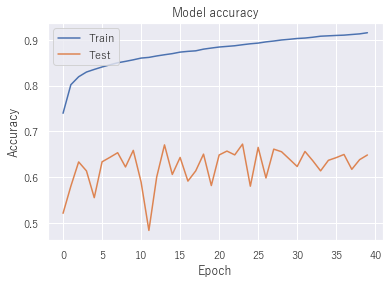

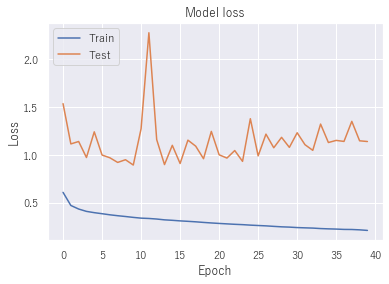

In [15]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
# plt.ylim((0, 3.5))
plt.show()

In [16]:
def plot_confusion_matrix(test_y,pred_y,class_names,normalize=False):
    cm = confusion_matrix(test_y,pred_y)
    # classes = class_names[unique_labels(test_y,pred_y)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(16, 8))
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=class_names,
           yticklabels=class_names,
           ylabel='True label\n',
           xlabel='\nPredicted label')
    fmt = '.2f' if normalize else 'd'
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j,
                    i,
                    format(cm[i, j], fmt),
                    ha="center",
                    va="center",
                    color="red", fontsize=16)
    fig.tight_layout()
    return ax

In [17]:
model = tf.keras.models.load_model("../Output/CheckPoint/保持位置/model_include_car_notHand_10-0.35-0.86-0.89-0.66.hdf5")
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 25, 1)] 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 128, 25, 1)] 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 126, 23, 64)  640         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 126, 23, 64)  640         input_2[0][0]                    
____________________________________________________________________________________________

(array([    0,     1,     2, ..., 29485, 29488, 29489], dtype=int64), array([2, 2, 1, ..., 0, 2, 0], dtype=int64))
(19868,) (19868, 2)


0.903

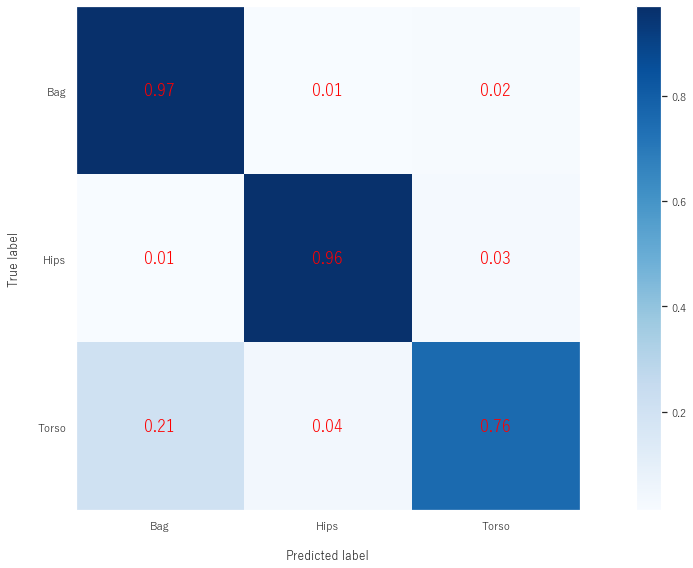

In [35]:
class_names = ['Bag', 'Hips', 'Torso']

predict = model.predict([X_val[:, 0], X_val[:, 1]])
print(np.where(predict >= 0.75))
print(predict[predict >= 0.75].shape, Y_val[np.where(predict >= 0.75)[0]].shape)
plot_confusion_matrix(Y_val[np.where(predict >= 0.99)[0]][:, 0], np.argmax(predict[np.where(predict >= 0.99)[0]], axis=1), class_names, True)
plt.grid(False)
f1_macro = f1_score(Y_val[np.where(predict >= 0.99)[0]][:, 0], np.argmax(predict[np.where(predict >= 0.99)[0]], axis=1), average='macro')
round(f1_macro, 3)

In [20]:
test = np.load("../Output/test/test_lacc_norm_spectram.npy").reshape([-1, 1, 128, 25])
test.shape

(57573, 1, 128, 25)

In [21]:
test = np.concatenate([test, np.load("../Output/test/test_gyr_norm_spectram.npy").reshape([-1, 1, 128, 25])], axis=1)
test.shape

(57573, 2, 128, 25)

In [ ]:
a = np.load("test_run_index.npy")
a.shape

In [ ]:
a = np.load("test_walking_run_index.npy")
a.shape

In [22]:
a = np.load("test_walking_run_car_index.npy")
a.shape

(9407,)

In [23]:
test = test.reshape([-1, 2, 128, 25, 1])
test.shape

(57573, 2, 128, 25, 1)

In [33]:
predict = model.predict([test[a, 0], test[a, 1]])
print(predict.shape)

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict[:, i]>=0.99)))

(9407, 3)
Bag：199
Hips：4294
Torso：9


In [26]:
predict = model.predict_proba(test)

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict[:, i]>=0.75)))

AttributeError: 'Model' object has no attribute 'predict_proba'

## trainデータ全部学習させて、validationデータをvalidationにする

In [ ]:
evals_result = {}

model = xgb.XGBClassifier(max_depth=18, min_child_weight=7, learning_rate=0.1, gamma=0.005, sub_sample=0.9, colsample_bytree=0.8, 
                          n_jobs=-1, tree_method='gpu_hist', gpu_id=0, n_estimator=10000)
model.fit(X_train[(Y_train[:, 1] > 1) & (Y_train[:, 1] <= 3)], Y_train[(Y_train[:, 1] > 1) & (Y_train[:, 1] <= 3)][:, 0], 
          early_stopping_rounds=30, 
          eval_set=[(X_train[(Y_train[:, 1] > 1) & (Y_train[:, 1] <= 3)], Y_train[(Y_train[:, 1] > 1) & (Y_train[:, 1] <= 3)][:, 0]), 
                    (X_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)], Y_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)][:, 0])], eval_metric='merror', verbose=False, 
          callbacks=[xgb.callback.record_evaluation(evals_result)])

In [ ]:
# 学習過程の名前は 'validation_{n}' になる
plt.figure(figsize=(24, 4))
train_metric = evals_result['validation_0']['merror']
plt.plot(train_metric, label='train merror')
eval_metric = evals_result['validation_1']['merror']
plt.plot(eval_metric, label='eval merror')
plt.grid()
plt.legend()
plt.xlabel('rounds(epochs)')
plt.ylabel('merror')
plt.xticks(np.arange(0, 150+1, 25))
plt.show()

In [ ]:
class_names = ['Bag', 'Hips', 'Torso', 'Hand']

predict = model.predict(X_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)])
plot_confusion_matrix(Y_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)][:, 0], predict, class_names, True)
plt.grid(False)

In [ ]:
predict = model.predict_proba(X_val[(Y_val[:, 1] > 1) & (Y_val[:, 1] <= 3)])

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict[:, i]>=0.70)))

In [ ]:
predict = model.predict_proba(test)

for i in range(len(class_names)):
    print("{}：{}".format(class_names[i], np.sum(predict[:, i]>=0.75)))